In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx

In [28]:
directory = '/Users/abhishekkumar/Documents/programming/himym/data/dataframes/'

main_charachters = ['ted', 'robin', 'barney', 'marshall', 'lily']
charachter_relations = {}
for file in os.listdir(directory):
    fileName = os.fsdecode(file)
    season = pd.read_csv(directory+file)
    for row in season.itertuples():
        speaker = str(row[4]).lower()
        if speaker in main_charachters:
            for main_charachter in main_charachters:
                if main_charachter in str(row[5]).lower():
                    if speaker not in charachter_relations:
                        charachter_relations[speaker] = {}
                    if main_charachter not in charachter_relations[speaker]:
                        charachter_relations[speaker][main_charachter] = 0
                    charachter_relations[speaker][main_charachter] += 1

print(charachter_relations)

{'robin': {'marshall': 79, 'barney': 161, 'ted': 376, 'lily': 127, 'robin': 55}, 'lily': {'ted': 321, 'marshall': 278, 'barney': 157, 'robin': 137, 'lily': 48}, 'barney': {'robin': 213, 'ted': 603, 'lily': 150, 'marshall': 194, 'barney': 125}, 'ted': {'lily': 212, 'robin': 250, 'ted': 305, 'marshall': 225, 'barney': 243}, 'marshall': {'barney': 167, 'robin': 127, 'ted': 387, 'lily': 310, 'marshall': 78}}


In [29]:
relations = pd.DataFrame(columns=['Charachter 1', 'Charachter 2', 'Count'])

for charachter in charachter_relations:
    for charachter2 in charachter_relations[charachter]:
        relations = relations.append(
            {
                'Charachter 1': min(charachter, charachter2),
                'Charachter 2': max(charachter, charachter2),
                'Count': charachter_relations[charachter][charachter2]
            }, ignore_index = True
        )

relations

,Charachter 1,Charachter 2,Count
0,marshall,robin,79
1,barney,robin,161
2,robin,ted,376
3,lily,robin,127
4,robin,robin,55
5,lily,ted,321
6,lily,marshall,278
7,barney,lily,157
8,lily,robin,137
9,lily,lily,48


In [30]:
relations = relations.groupby(['Charachter 1', 'Charachter 2']).sum().reset_index()
relations

,Charachter 1,Charachter 2,Count
0,barney,barney,125
1,barney,lily,307
2,barney,marshall,361
3,barney,robin,374
4,barney,ted,846
5,lily,lily,48
6,lily,marshall,588
7,lily,robin,264
8,lily,ted,533
9,marshall,marshall,78


In [31]:
selfconceited = relations.where(relations['Charachter 1']==relations['Charachter 2']).dropna().reset_index().drop(columns=['index', 'Charachter 2'])
selfconceited

,Charachter 1,Count
0,barney,125.0
1,lily,48.0
2,marshall,78.0
3,robin,55.0
4,ted,305.0


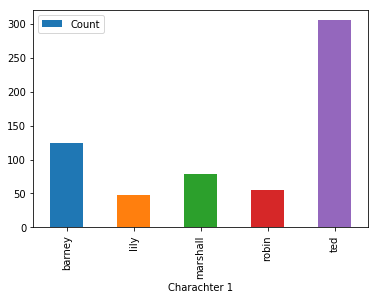

In [32]:
selfconceited.plot(kind='bar', y='Count', x='Charachter 1')

In [33]:
friendship = relations.where(relations['Charachter 1']!=relations['Charachter 2']).dropna().reset_index().drop(columns=['index'])
friendship

,Charachter 1,Charachter 2,Count
0,barney,lily,307.0
1,barney,marshall,361.0
2,barney,robin,374.0
3,barney,ted,846.0
4,lily,marshall,588.0
5,lily,robin,264.0
6,lily,ted,533.0
7,marshall,robin,206.0
8,marshall,ted,612.0
9,robin,ted,626.0


In [34]:
friendGraph = nx.from_pandas_edgelist(friendship, 'Charachter 1', 'Charachter 2', edge_attr='Count')

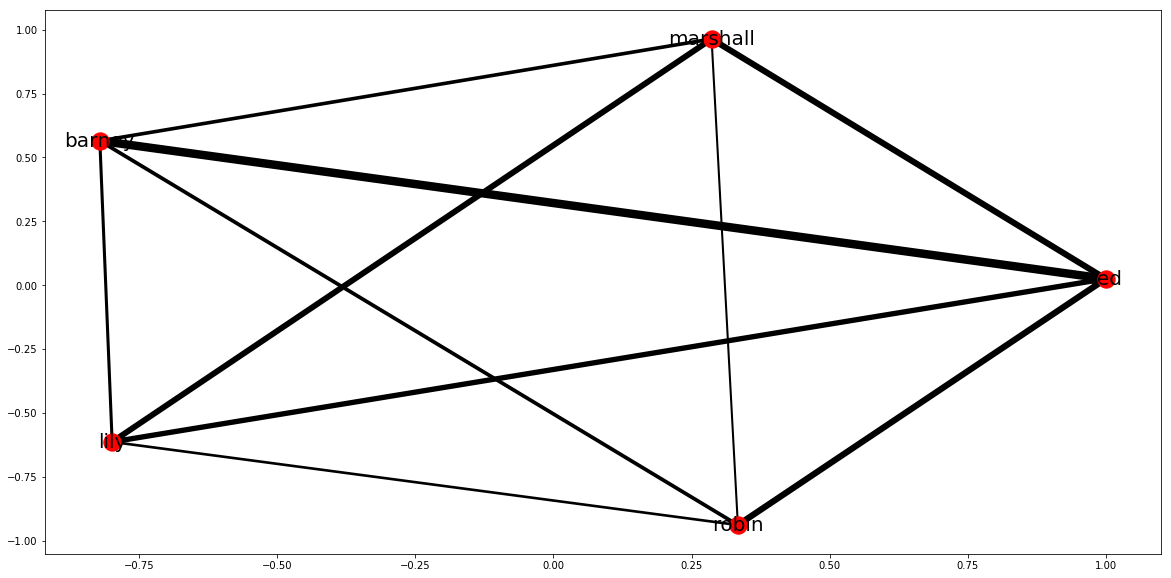

In [35]:
fig, ax = plt.subplots(figsize=(20,10))
pos = nx.spring_layout(friendGraph)
widths = [.01*i['Count'] for i in dict(friendGraph.edges).values()]
labels = {i:i for i in dict(friendGraph.nodes).keys()}
nx.draw_networkx_nodes(friendGraph, pos, ax = ax, labels=True)
nx.draw_networkx_edges(friendGraph, pos, width=widths, ax=ax)
_ = nx.draw_networkx_labels(friendGraph, pos, labels, ax=ax,font_size=20)

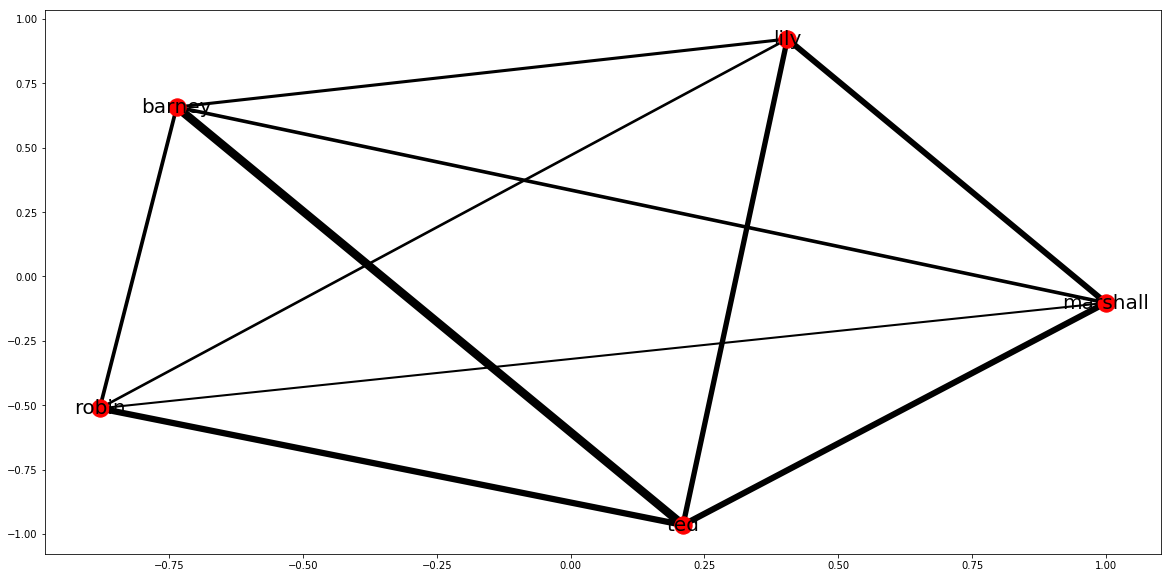

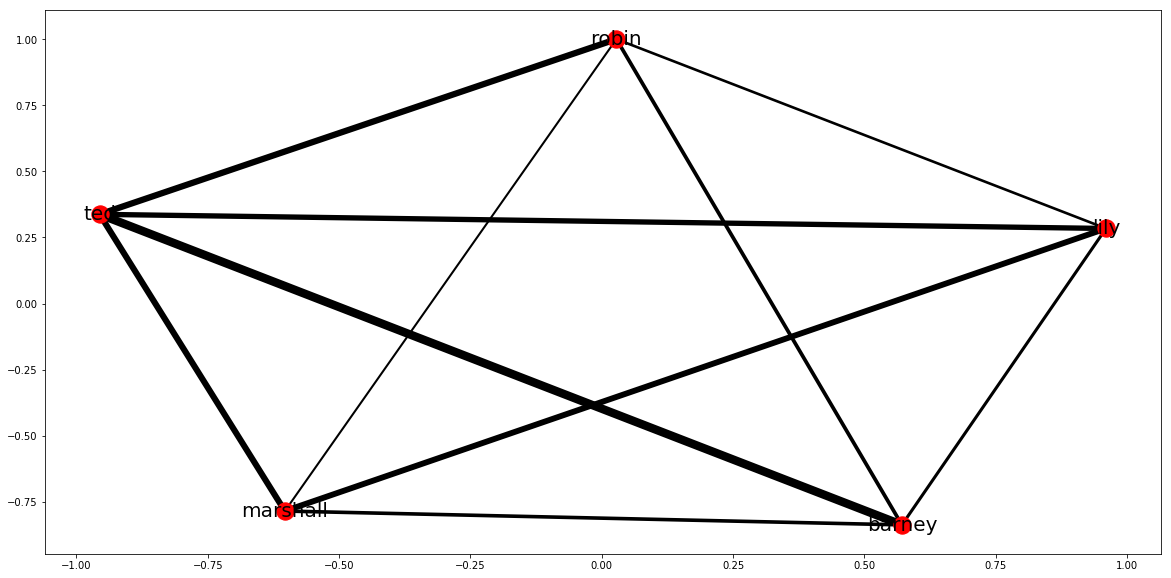

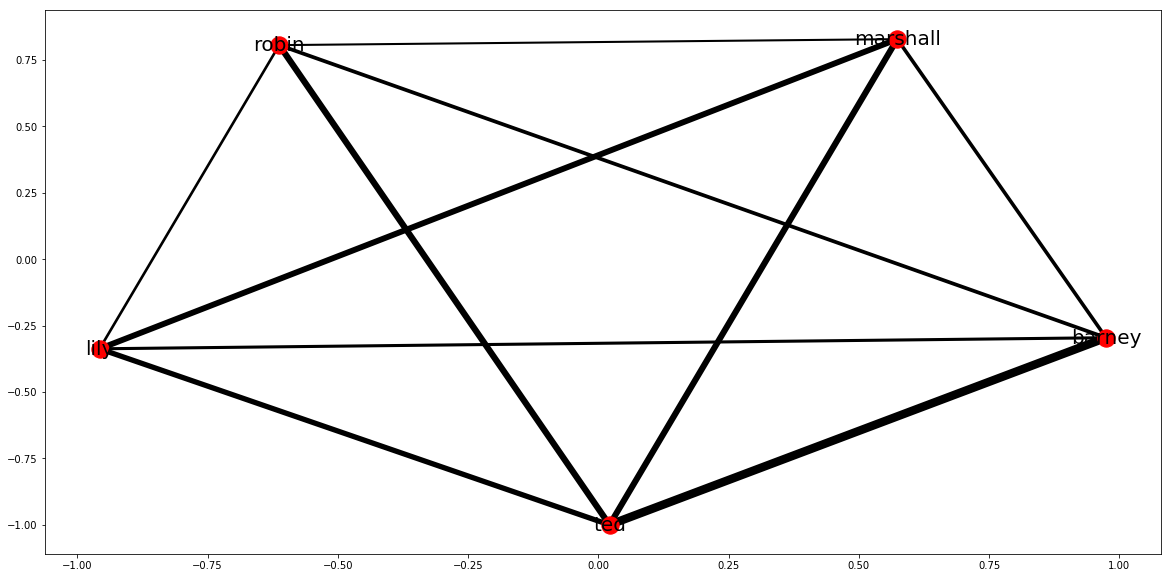

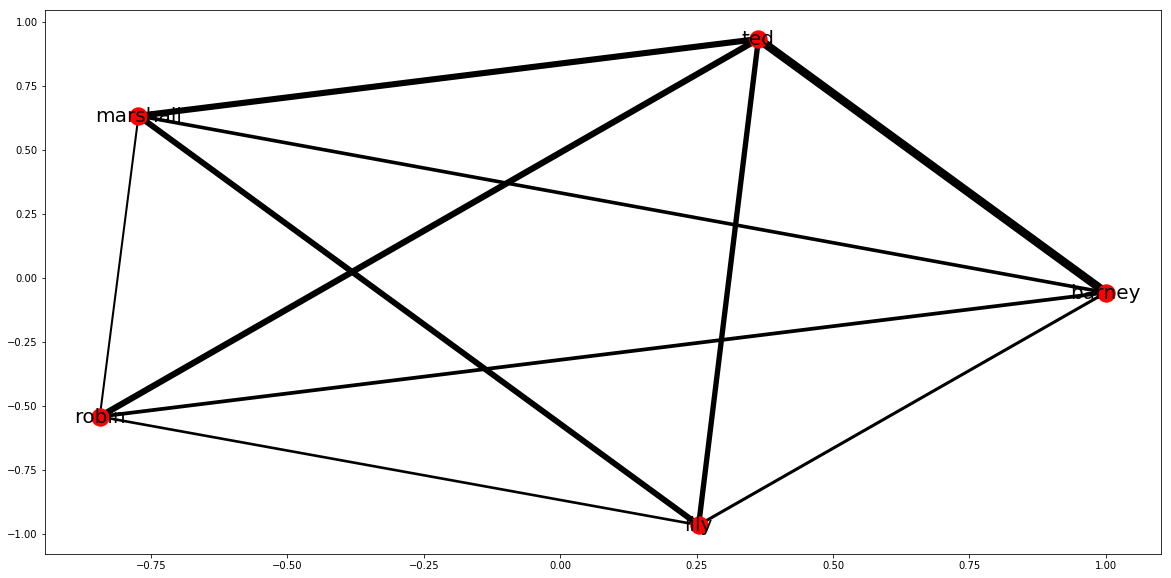

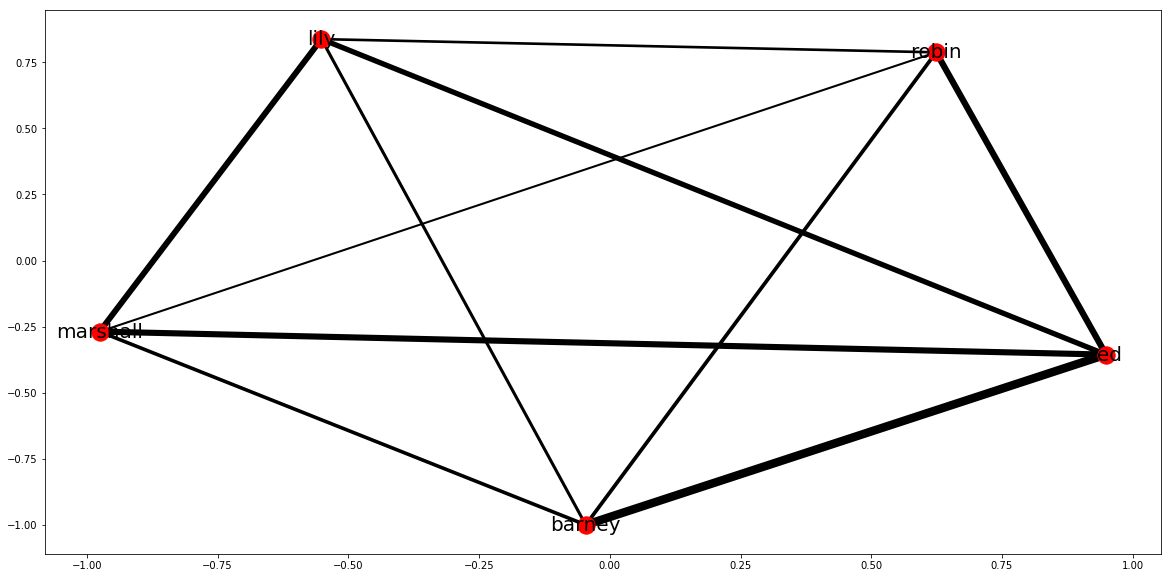

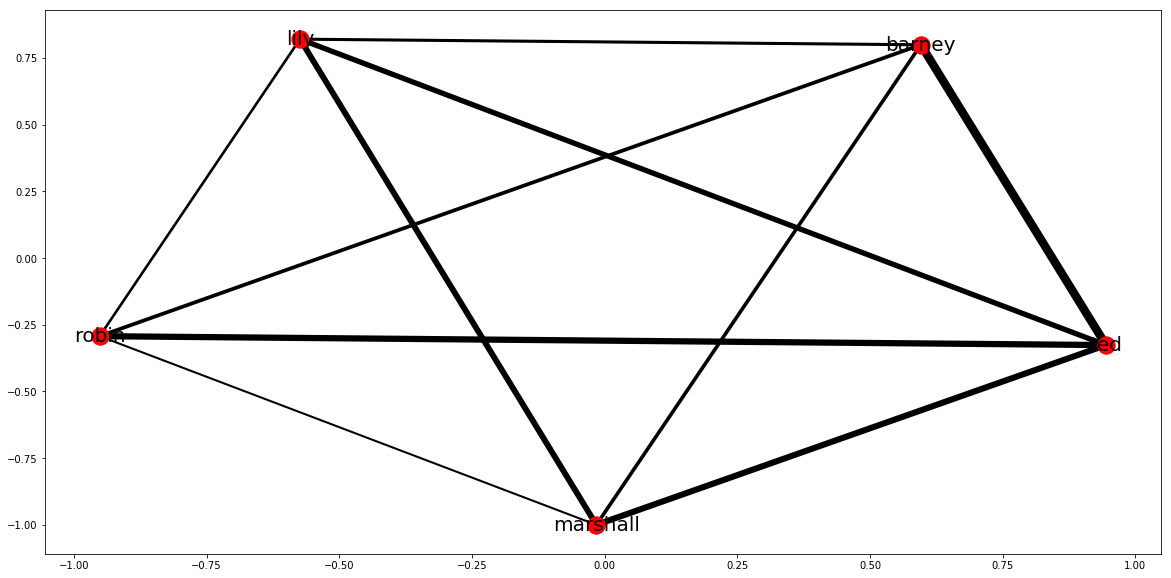

In [36]:
for i in range(1,7):
    fileName = os.fsdecode(file)
    cur_season = pd.read_csv(directory+file)
    for row in season.itertuples():
        speaker = str(row[4]).lower()
        if speaker in main_charachters:
            for main_charachter in main_charachters:
                if main_charachter in str(row[5]).lower():
                    if speaker not in charachter_relations:
                        charachter_relations[speaker] = {}
                    if main_charachter not in charachter_relations[speaker]:
                        charachter_relations[speaker][main_charachter] = 0
                    charachter_relations[speaker][main_charachter] += 1
    cur_relations = pd.DataFrame(columns=['Charachter 1', 'Charachter 2', 'Count'])

    for charachter in charachter_relations:
        for charachter2 in charachter_relations[charachter]:
            cur_relations = relations.append(
                {
                    'Charachter 1': min(charachter, charachter2),
                    'Charachter 2': max(charachter, charachter2),
                    'Count': charachter_relations[charachter][charachter2]
                }, ignore_index = True
            )
    cur_friendship = cur_relations.where(relations['Charachter 1']!=relations['Charachter 2']).dropna().reset_index().drop(columns=['index'])
    cur_friendGraph = nx.from_pandas_edgelist(cur_friendship, 'Charachter 1', 'Charachter 2', edge_attr='Count')
    fig, ax = plt.subplots(figsize=(20,10))
    pos = nx.spring_layout(friendGraph)
    widths = [.01*i['Count'] for i in dict(cur_friendGraph.edges).values()]
    labels = {i:i for i in dict(cur_friendGraph.nodes).keys()}
    nx.draw_networkx_nodes(cur_friendGraph, pos, ax = ax, labels=True)
    nx.draw_networkx_edges(cur_friendGraph, pos, width=widths, ax=ax)
    _ = nx.draw_networkx_labels(cur_friendGraph, pos, labels, ax=ax,font_size=20)